https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import SpectralClustering

In [4]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()
from tqdm.notebook import tqdm
import csv

In [5]:
df = pd.read_csv('covtypeDataset/covtype.data')
df = df.mask(np.random.choice([True, False], size=df.shape, p=[.60,.40]))
df

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,NaN,56.0,2.0,212.0,-6.0,NaN,NaN,235.0,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,5.0
1,2804.0,NaN,NaN,268.0,NaN,NaN,NaN,238.0,135.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0
2,2785.0,155.0,NaN,NaN,NaN,NaN,238.0,238.0,122.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,NaN,NaN,NaN,NaN,NaN,391.0,220.0,234.0,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,5.0
4,NaN,132.0,6.0,300.0,-15.0,NaN,230.0,NaN,140.0,6031.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,118.0,837.0,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,3.0
581007,2391.0,152.0,NaN,NaN,12.0,NaN,NaN,237.0,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,3.0
581008,2386.0,NaN,17.0,NaN,7.0,NaN,236.0,NaN,130.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581009,NaN,170.0,NaN,60.0,5.0,NaN,230.0,NaN,NaN,864.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [6]:
table2=df.loc[0:5000]
x,y=table2.shape
print(x,y)

5001 55


In [11]:

for k in tqdm(range(1)):
    W=[[0.0 for i in range(x)] for j in range(x)]
    for i in range(x):
        for j in range(i+1,x,1):
            z=table2[i:i+1:].append(table2[j:j+1:], ignore_index=True)
            z=z.dropna(axis=1)
            if z.shape[1] == 0:
                continue
            W[i][j]=W[j][i]=pairwise_distances(z.values,metric="l1")[0][1]
            del(z)
#         print(i)
print(W)
with open("similarityGraph3.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(W)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
df = pd.read_csv("similarityGraph3.csv",header=None)

In [8]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,0.0,59.0,15.0,1.0,194.0,58.0,0.0,14.0,35.0,11.0,...,1.0,0.0,69.0,0.0,212.0,2593.0,0.0,5460.0,2.0,4977.0
1,59.0,0.0,110.0,2811.0,3121.0,2.0,3.0,2629.0,2654.0,67.0,...,2274.0,4.0,189.0,0.0,695.0,477.0,1534.0,2898.0,1107.0,867.0


In [9]:
kk=df.values.tolist()
len(kk)

5001

In [10]:
kkk=np.array(kk)
kkk=kkk[:500,:500]
kkk

array([[0.000, 59.000, 15.000, ..., 3262.000, 406.000, 0.000],
       [59.000, 0.000, 110.000, ..., 0.000, 598.000, 125.000],
       [15.000, 110.000, 0.000, ..., 3248.000, 244.000, 145.000],
       ...,
       [3262.000, 0.000, 3248.000, ..., 0.000, 0.000, 0.000],
       [406.000, 598.000, 244.000, ..., 0.000, 0.000, 346.000],
       [0.000, 125.000, 145.000, ..., 0.000, 346.000, 0.000]])

In [11]:
vectorizer = np.vectorize(lambda x: 1 if x < 2000 else 0)

Ww = np.vectorize(vectorizer)(kk)

In [12]:
# degree matrix
D = np.diag(np.sum(np.array(Ww), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - Ww
print('laplacian matrix:')
print(L)

degree matrix:
[[3102    0    0 ...    0    0    0]
 [   0 3739    0 ...    0    0    0]
 [   0    0 2418 ...    0    0    0]
 ...
 [   0    0    0 ... 4297    0    0]
 [   0    0    0 ...    0 4501    0]
 [   0    0    0 ...    0    0 3858]]
laplacian matrix:
[[3101   -1   -1 ...    0   -1    0]
 [  -1 3738   -1 ...    0   -1   -1]
 [  -1   -1 2417 ...    0   -1    0]
 ...
 [   0    0    0 ... 4296   -1    0]
 [  -1   -1   -1 ...   -1 4500   -1]
 [   0   -1    0 ...    0   -1 3857]]


In [13]:
e, v = np.linalg.eigh(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)


eigenvalues:
[-0.000 2039.761 2096.584 ... 5001.000 5001.000 5001.000]
eigenvectors:
[[-0.014 0.001 -0.001 ... 0.000 -0.000 0.000]
 [-0.014 -0.000 -0.000 ... -0.000 0.000 -0.000]
 [-0.014 -0.000 -0.000 ... -0.000 0.000 0.000]
 ...
 [-0.014 -0.000 0.001 ... -0.000 -0.000 0.000]
 [-0.014 -0.000 0.000 ... -0.000 0.000 -0.000]
 [-0.014 -0.000 0.001 ... 0.000 -0.000 0.000]]


In [14]:
np.where(e<0.01)

(array([0]),)

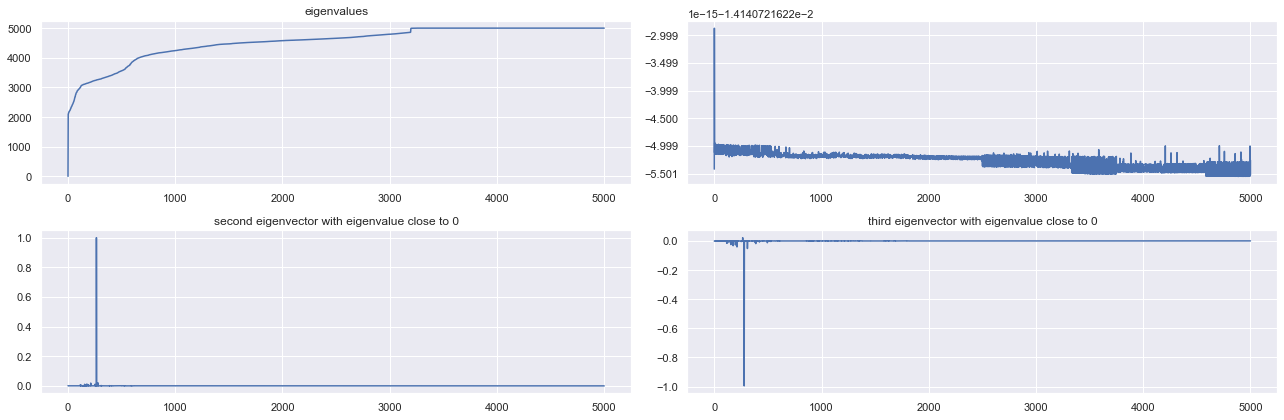

In [17]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 15000)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()


In [18]:
U = np.array(v[:, i[0]])


In [19]:
km = KMeans(init='k-means++', n_clusters=4)
km.fit(U.reshape(-1, 1))
km.labels_

array([1, 3, 3, ..., 1, 2, 0], dtype=int32)

In [20]:
len(km.labels_)

5001

In [17]:
#table3=table3.iloc[:500,:]
table3["Cluster"]=km.labels_
#table3

# centroids = clusters' center points
#centroids = cluster.cluster_centers_
title="RelativeHumidity"
weather_clusters=table3[["Lat","Longt","Cluster",title]]
#print(weather_clusters)
weather_clusters.to_csv('ClusteredDatanew.csv', index=False)


In [20]:
table4 =table2
table4["Cluster"]=km.labels_
table4.loc[table3['Cluster'] == 3]

,AirTemp,Alt,DewPoint,Pressure,RelativeHumidity,Visibility,WindDirection,WindGust,WindSpeed,Lat,Longt,Cluster
7,101.500000,3092.0,NaN,26.6900,NaN,NaN,252.25,20.00,13.00,36.8033,-115.9772,3
18,99.000000,3676.0,NaN,26.0725,NaN,NaN,193.75,20.25,12.75,36.6614,-116.0050,3
20,103.000000,2787.0,45.875,27.0000,14.75,NaN,193.25,16.75,9.25,36.6856,-116.4069,3
21,98.500000,3631.0,NaN,NaN,NaN,NaN,223.75,15.75,7.50,36.9006,-116.0428,3
22,102.250000,3160.0,34.675,NaN,9.75,NaN,244.00,16.75,11.25,36.8436,-115.9083,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,42.533333,2949.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,47.9900,-114.0600,3
8526,102.000000,3440.0,26.300,NaN,7.00,NaN,212.00,18.00,10.00,37.2161,-113.3778,3
8528,89.000000,2610.0,42.700,NaN,20.00,NaN,300.00,10.00,5.00,43.5114,-102.4969,3
8561,98.000000,3180.0,34.500,NaN,11.00,NaN,137.00,16.00,7.00,36.4367,-115.3314,3
